In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
#from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [0]:
from google.colab import files
files.upload()


Output hidden; open in https://colab.research.google.com to view.

# Data exploration 




In [0]:
df = pd.read_csv('/content/fulltable.csv')
df.head()

,patientunitstayid,apacheadmissiondx,unittype,apache_iv,aniongap_min,aniongap_max,albumin_min,albumin_max,bands_min,bands_max,...,avg_spo2,avg_nibp_systolic,avg_nibp_diastolic,avg_nibp_mean,avg_temperature,avg_ibp_systolic,avg_ibp_diastolic,avg_ibp_mean,IMC,dialysis
0,254141,"Sepsis, unknown",Med-Surg ICU,57.0,10.0,21.0,2.9,4.2,1.0,8.0,...,95.977778,102.826772,57.771654,75.515873,37.225200,NaN,NaN,NaN,30.452052,1
1,264460,"Pneumonia, bacterial",Med-Surg ICU,73.0,18.0,18.0,3.9,3.9,NaN,NaN,...,98.469534,138.348337,39.477495,75.633205,37.020590,NaN,NaN,NaN,27.426389,1
2,431561,"Respiratory - medical, other",Med-Surg ICU,103.0,8.0,17.0,1.0,1.9,NaN,NaN,...,99.206522,108.111111,56.555556,68.296296,36.190123,117.757377,53.590164,75.770492,35.112165,1
3,441673,"Sepsis, other",Med-Surg ICU,120.0,14.0,17.0,2.7,2.9,8.0,8.0,...,99.361446,98.910180,61.155689,69.886228,36.847059,NaN,NaN,NaN,23.732181,1
4,441947,"Neoplasm-cranial, surgery for (excluding trans...",Neuro ICU,48.0,8.0,10.0,2.8,2.8,NaN,NaN,...,95.907104,128.712871,66.326733,79.651163,37.280226,132.203125,58.645833,77.875648,38.876608,1


In [0]:
df['dialysis'].value_counts()

0    18198
1     1153
Name: dialysis, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


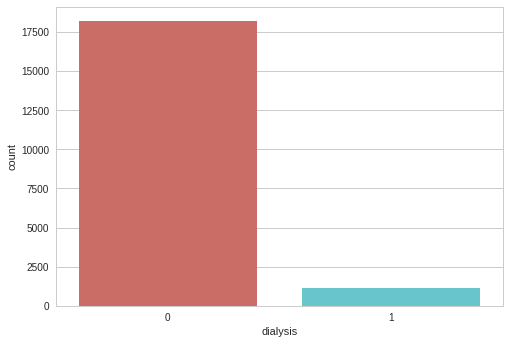

In [0]:
sns.countplot(x='dialysis', data=df, palette='hls')
plt.show()


In [0]:
df.describe()

,patientunitstayid,apache_iv,aniongap_min,aniongap_max,albumin_min,albumin_max,bands_min,bands_max,bicarbonate_min,bicarbonate_max,...,avg_spo2,avg_nibp_systolic,avg_nibp_diastolic,avg_nibp_mean,avg_temperature,avg_ibp_systolic,avg_ibp_diastolic,avg_ibp_mean,IMC,dialysis
count,1.935100e+04,16568.000000,15479.000000,15479.000000,15496.000000,15496.000000,3490.000000,3490.000000,18375.000000,18375.000000,...,16246.000000,17925.000000,17924.000000,16791.000000,18711.000000,5156.000000,5147.000000,6047.000000,18488.000000,19351.000000
mean,1.815968e+06,72.465295,10.703618,15.273564,2.731748,3.051549,10.531819,14.316559,20.075331,24.278259,...,96.350307,120.075126,64.105902,78.810209,36.773721,116.822457,57.715184,78.158625,321.062244,0.059583
std,1.081759e+06,29.185288,4.704200,6.658700,0.721019,0.733738,11.375109,13.956083,6.166048,5.468000,...,2.938926,18.467062,11.008272,12.709101,0.569275,19.965021,10.766386,13.721678,10479.031234,0.236720
min,1.412660e+05,-1.000000,1.000000,1.000000,0.400000,0.400000,0.500000,0.500000,1.000000,3.000000,...,2.000000,46.500000,17.000000,28.000000,26.700000,2.000000,1.000000,1.000000,0.130166,0.000000
25%,8.379000e+05,53.000000,7.000000,11.000000,2.200000,2.500000,3.000000,4.000000,16.000000,21.000000,...,95.365436,106.811321,56.616635,69.942179,36.555556,105.301190,51.000000,70.320022,24.076499,0.000000
50%,1.650372e+06,68.000000,10.000000,14.000000,2.700000,3.100000,6.960000,10.000000,20.000000,24.000000,...,96.698503,118.238095,63.375000,77.424242,36.773333,115.809733,56.900000,76.880952,28.506451,0.000000
75%,3.000114e+06,88.000000,13.000000,18.300000,3.200000,3.600000,14.975000,20.000000,24.000000,27.000000,...,97.951574,132.000000,70.628897,86.274295,37.025092,128.481009,64.000000,85.026901,34.713090,0.000000
max,3.353254e+06,211.000000,48.000000,66.000000,7.600000,7.600000,97.400000,97.400000,51.000000,77.000000,...,100.000000,218.000000,127.000000,170.000000,41.000000,300.000000,121.200000,238.500000,725551.020408,1.000000


In [0]:
tmp_df = df["unittype"]
# print(tmp_df.head(25))
# print(tmp_df.isna().sum()/df.describe()['patientunitstayid']['count'])
tmp_df.isna().sum()
tmp_df.value_counts()

#df["unittype"] = df["unittype"].astype('category')
#df.dtypes
#df["unittype_cat"] = df["unittype"].cat.codes
#df.head()

df = pd.get_dummies(df, columns=["unittype"])

In [0]:
#patientunitstayid eliminada por no aportar ninguna informacion
#lactate_min 41% NaN
#lactate_max 41% NaN
#avg_fio2 41% NaN
#hco3_min 45% NaN
#hco3_max 45% NaN
#avg_dopamine 95% NaN
#avg_dobutamine 97% NaN
#avg_norepinephrine 66% NaN
#avg_ibp_systolic 73% NaN
#avg_ibp_mean 69% NaN
#bands_min 82% NaN
#bands_max 82% NaN
df_filtered = df.drop(['hosp_mortality','patientunitstayid','apacheadmissiondx','lactate_min','lactate_max','avg_fio2','hco3_min','hco3_max','avg_dopamine','avg_dobutamine','avg_norepinephrine','avg_ibp_systolic','avg_ibp_diastolic','avg_ibp_mean','bands_min','bands_max', 'bilirubin_min', 'aniongap_min', 'albumin_max'], axis=1)
#df_filtered = df[['icu_los_hours','avg_urineoutput','creatinine_max','avg_outputtotal','creatinine_min','hemoglobin_min','age','hematocrit_min','bun_max','apache_iv','dialysis']]
#df_filtered.head()

In [0]:
df_filtered.isna().sum()

apache_iv                2783
aniongap_max             3872
albumin_min              3855
bicarbonate_min           976
bicarbonate_max           976
bilirubin_max            4640
creatinine_min            383
creatinine_max            383
chloride_min              484
chloride_max              484
glucose_min               462
glucose_max               462
hematocrit_min            578
hematocrit_max            578
hemoglobin_min            671
hemoglobin_max            671
potassium_min             426
potassium_max             426
sodium_min                369
sodium_max                369
bun_min                   383
bun_max                   383
age                         1
gender                      5
icu_los_hours               0
avg_pao2                 7296
avg_outputtotal          3161
avg_urineoutput          3161
avg_heartrate            1199
avg_respiratoryrate      1392
avg_spo2                 3105
avg_nibp_systolic        1426
avg_nibp_diastolic       1427
avg_nibp_m

In [0]:
df_filtered1 = df_filtered.dropna(how='any')

In [0]:
print(len(df_filtered1))

4685


In [0]:
# Class count
balancear = False
if balancear:
  count_class_0, count_class_1 = df_filtered1.dialysis.value_counts()# Divide by class
  df_class_0 = df_filtered1[df_filtered1['dialysis'] == 0]
  df_class_1 = df_filtered1[df_filtered1['dialysis'] == 1]
  df_class_0_under = df_class_0.sample(count_class_1)
  df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
  print('Random under-sampling:')
  print(df_test_under.dialysis.value_counts())
  df_test_under.dialysis.value_counts().plot(kind='bar', title='Count (dialysis)');

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


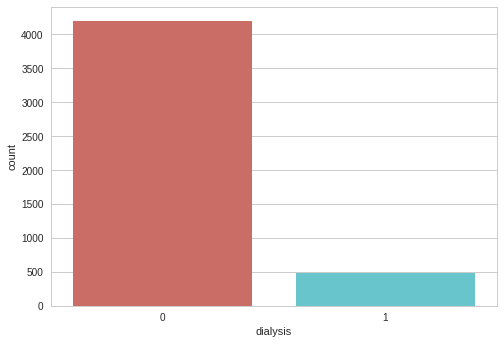

In [0]:
sns.countplot(x='dialysis', data=df_filtered1, palette='hls')
plt.show()


Text(0, 0.5, 'Frequency of dialysis')

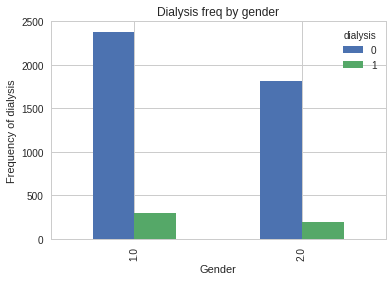

In [0]:
%matplotlib inline
pd.crosstab(df_filtered1.gender,df_filtered1.dialysis).plot(kind='bar')
plt.title('Dialysis freq by gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of dialysis')


In [0]:
#df_filtered1.age.hist()
#plt.title('Histogram of Age')
#plt.xlabel('Age')
#plt.ylabel('Frequency')
#plt.savefig('hist_age')

In [0]:
'''
float              float64
int                  int64
datetime    datetime64[ns]
string              object
'''
df_filtered1.dtypes


apache_iv                float64
aniongap_max             float64
albumin_min              float64
bicarbonate_min          float64
bicarbonate_max          float64
bilirubin_max            float64
creatinine_min           float64
creatinine_max           float64
chloride_min             float64
chloride_max             float64
glucose_min              float64
glucose_max              float64
hematocrit_min           float64
hematocrit_max           float64
hemoglobin_min           float64
hemoglobin_max           float64
potassium_min            float64
potassium_max            float64
sodium_min               float64
sodium_max               float64
bun_min                  float64
bun_max                  float64
age                       object
gender                   float64
icu_los_hours              int64
avg_pao2                 float64
avg_outputtotal          float64
avg_urineoutput          float64
avg_heartrate            float64
avg_respiratoryrate      float64
avg_spo2  

In [0]:
#df_filtered1['age'] = df_filtered1['age'].apply(pd.to_numeric, errors ='coerce')

df_filtered1 = df_filtered1.apply(pd.to_numeric, errors ='coerce')


In [0]:
df_filtered1 = df_filtered1.dropna(how='any')


In [0]:
#Recursive Feature Elimination
data_final_vars=df_filtered1.columns.values.tolist()
y=df_filtered1['dialysis']
X=df_filtered1.drop('dialysis',axis=1)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureW

[False  True  True  True False False  True False False  True False False
 False  True  True  True  True  True False  True False False False  True
 False False False False False False  True False False False  True False
  True  True  True  True  True  True False False]
[ 7  1  1  1 14 21  1 20 19  1 24 22  8  1  1  1  1  1  2  1  4  6  3  1
 11 17 18 16 23 10  1 12  9 15  1 25  1  1  1  1  1  1 13  5]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
print(len(df_filtered1))


4534


[False False  True  True  True  True False  True  True  True False False
  True False False False  True  True  True  True  True  True  True  True
 False  True  True False False False False False False False  True False
 False False  True False]
[ 3 10  1  1  1  1  7  1  1  1 16 17  1 20 19  6  1  1  1  1  1  1  1  1
  2  1  1  8  9 15 18 12 14  5  1 13  4 11  1 21]
  
  

In [0]:
import statsmodels.api as sm
y=df_filtered1['dialysis']
X=df_filtered1.drop('dialysis',axis=1)
#logit_model=sm.Logit(y,X)
#result=logit_model.fit()
# print(result.summary2())

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Start to apply prediction algorithms

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
#dataset = pd.read_csv('/Users/uxuelazkanodobao/Documents/DATATHON/iris.csv')

# Any results you write to the current directory are saved as output.
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score

In [0]:
# df_filtered1.columns

In [0]:
# Split the data into Training and Testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(len(y_test))

1361


In [0]:
#Creo que esto no está bien, hay que hacer un fit del scaler con los datos train y luego aplicar ese scaler a todo el resto
# Feature scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.fit_transform(x_test)

In [0]:
#Fitting logistic regression to the training set
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(random_state = 0)
# classifier.fit(x_train,y_train)

In [0]:
#Set up cross validation
from sklearn.model_selection import cross_val_score
# scores = cross_val_score(classifier, x_train, y_train, cv=5)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [0]:
# Predicting the Test set results
# y_pred = classifier.predict(x_test)

In [0]:
# Making the confusion matrix 
from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test,y_pred)

In [0]:
# Making the confusion matrix 
from sklearn import metrics
# print (metrics.accuracy_score(y_test,classifier.predict(x_test)))

In [0]:
#Improve the technique of logistic regression
# predict_prob_df=pd.DataFrame(classifier.predict_proba(x_test))
# predict_prob_df.head(5)

# SVM-Support Vector Machine for Classification


In [0]:
# Linear SVC
# from sklearn.svm import LinearSVC
# linear_svc = LinearSVC()
# linear_svc.fit(x_train, y_train)
# y_pred = linear_svc.predict(x_test)
# acc_linear_svc = round(linear_svc.score(x_test, y_test) * 100, 2)
# acc_linear_svc
# kp_linear_svc = cohen_kappa_score(y_test,y_pred)
# auc_linear_svc = roc_auc_score(y_test, y_pred)
# acc_linear_svc = cross_val_score(linear_svc, x_train, y_train, cv=5)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [0]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC(random_state=101)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_test, y_test) * 100, 2)
kp_svc = cohen_kappa_score(y_test,y_pred)
auc_svc = roc_auc_score(y_test, y_pred)
acc_svc = cross_val_score(svc, x_train, y_train, cv=5)
acc_svc
x_test

,apache_iv,aniongap_max,albumin_min,bicarbonate_min,bicarbonate_max,bilirubin_max,creatinine_min,creatinine_max,chloride_min,chloride_max,...,avg_temperature,IMC,unittype_CCU-CTICU,unittype_CSICU,unittype_CTICU,unittype_Cardiac ICU,unittype_MICU,unittype_Med-Surg ICU,unittype_Neuro ICU,unittype_SICU
1504,74.0,12.0,2.9,14.0,24.0,0.70,1.46,4.29,96.0,115.0,...,37.309091,47.246158,0,0,0,0,0,1,0,0
3230,53.0,10.0,2.9,22.0,26.0,0.80,1.97,2.08,109.0,110.0,...,36.428571,30.009527,0,0,0,0,0,1,0,0
9949,126.0,7.0,1.3,16.0,23.0,1.60,0.72,1.01,124.0,129.0,...,36.741667,20.721888,0,0,0,0,0,1,0,0
856,102.0,16.0,1.7,17.0,22.0,0.50,1.79,2.04,109.0,114.0,...,36.945788,20.654479,0,1,0,0,0,0,0,0
11017,88.0,4.0,2.1,33.0,33.0,0.20,0.48,0.48,100.0,100.0,...,37.511465,40.363660,0,0,0,0,0,1,0,0
16457,76.0,6.0,1.9,26.0,26.0,2.00,0.78,1.15,104.0,112.0,...,37.351905,36.546166,0,0,0,0,0,1,0,0
184,84.0,16.0,1.7,13.0,21.0,12.80,0.95,1.68,89.0,94.0,...,36.522857,28.765549,0,0,0,0,0,1,0,0
14121,59.0,11.0,3.5,20.0,23.0,0.80,1.69,2.14,96.0,106.0,...,36.694595,25.835037,1,0,0,0,0,0,0,0
12719,90.0,25.0,2.6,11.0,23.0,3.50,1.20,2.80,102.0,105.0,...,37.028571,30.861276,0,0,0,0,1,0,0,0
4555,129.0,24.0,1.5,10.0,15.0,28.50,8.10,8.90,100.0,102.0,...,36.804348,53.667820,0,0,0,0,0,1,0,0


In [0]:
#AUC for SVM


# Logistic regression

In [0]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=101)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_test, y_test) * 100, 2)
kp_log = cohen_kappa_score(y_test,y_pred)
auc_log = roc_auc_score(y_test, y_pred)
acc_log = cross_val_score(logreg, x_train, y_train, cv=5)
acc_log

array([0.89291339, 0.88976378, 0.88818898, 0.89116719, 0.89747634])

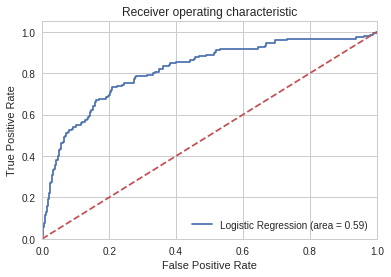

In [0]:
#AUC para Logistic regression 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

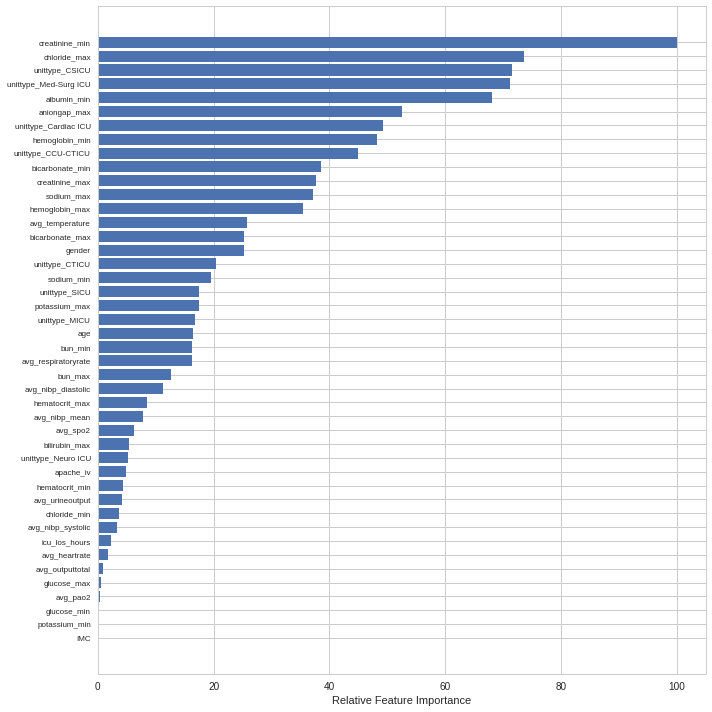

In [0]:

feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

# KNN - K Nearest Neighbour Prediction


In [0]:
#KNN - K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

#params = [1,2,3,4,5,6,7,8,9,10,15,20,35,50]
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_test, y_test) * 100, 2)
kp_knn = cohen_kappa_score(y_test,y_pred)
auc_knn = roc_auc_score(y_test, y_pred)
acc_knn = cross_val_score(knn, x_train, y_train, cv=5)
acc_knn


array([0.88188976, 0.87874016, 0.87716535, 0.87381703, 0.88801262])

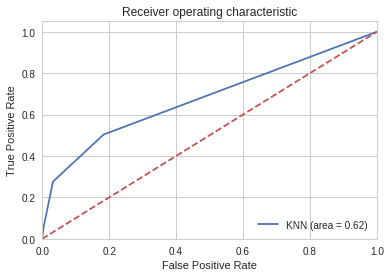

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, knn.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Gaussian Naive Bayes

In [0]:
# Gaussian Naive Bayes
# from sklearn.naive_bayes import GaussianNB
# gaussian = GaussianNB()
# gaussian.fit(x_train, y_train)
# y_pred = gaussian.predict(x_test)
# acc_gaussian = round(gaussian.score(x_test, y_test) * 100, 2)
# acc_gaussian
# kp_gaussian = cohen_kappa_score(y_test,y_pred)
# auc_gaussian = roc_auc_score(y_test, y_pred)
# acc_gaussian = cross_val_score(gaussian, x_train, y_train, cv=5)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


# Perceptron Model/Algorithm analysis

In [0]:
# Perceptron
# from sklearn.linear_model import Perceptron
# perceptron = Perceptron()
# perceptron.fit(x_train, y_train)
# y_pred = perceptron.predict(x_test)
# acc_perceptron = round(perceptron.score(x_test, y_test) * 100, 2)
# acc_perceptron
# kp_perceptron = cohen_kappa_score(y_test,y_pred)
# auc_perceptron = roc_auc_score(y_test, y_pred)
# acc_perceptron = cross_val_score(perceptron, x_train, y_train, cv=5)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Stochastic Gradient Descent

In [0]:
# Stochastic Gradient Descent
# from sklearn import linear_model
# clf = linear_model.SGDClassifier()
# clf.fit(x_train, y_train)
# y_pred = clf.predict(x_test)
# acc_sgd = round(clf.score(x_test, y_test) * 100, 2)
# acc_sgd
# kp_sgd = cohen_kappa_score(y_test,y_pred)
# auc_sgd = roc_auc_score(y_test, y_pred)
# acc_sgd = cross_val_score(clf, x_train, y_train, cv=5)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Decision Tree Algorithm 

In [0]:
# Decision Tree
# from sklearn.tree import DecisionTreeClassifier
# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(x_train, y_train)
# y_pred = decision_tree.predict(x_test)
# acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
# acc_decision_tree
# kp_decision_tree = cohen_kappa_score(y_test,y_pred)
# auc_decission_tree = roc_auc_score(y_test, y_pred)
# acc_decision_tree = cross_val_score(decision_tree, x_train, y_train, cv=5)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Random Forest

In [0]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state =101)
random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_test, y_test) * 100, 2)

kp_random_forest = cohen_kappa_score(y_test,y_pred)
auc_random_forest = roc_auc_score(y_test, y_pred)
acc_random_forest = cross_val_score(random_forest, x_train, y_train, cv=5)
# auc_random_forest2 = cross_val_score(random_forest, x_train, y_train, cv=5, scoring='roc_auc')
# print(auc_random_forest,auc_random_forest2)
acc_random_forest

array([0.89291339, 0.8992126 , 0.89133858, 0.89589905, 0.90063091])

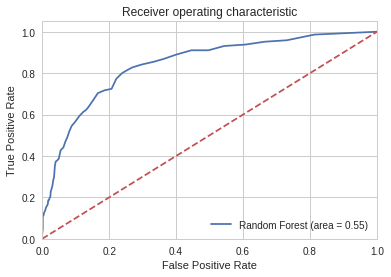

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, random_forest.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, random_forest.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Model evaluation 



In [0]:
# models = pd.DataFrame({
#     'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
#               'Random Forest', 'Naive Bayes', 'Perceptron', 
#               'Stochastic Gradient Decent', 'Linear SVC', 
#               ],
#     'Accuracy': [acc_svc.mean(), acc_knn.mean(), acc_log.mean(), 
#               acc_random_forest.mean(), acc_gaussian.mean(), acc_perceptron.mean(), 
#               acc_sgd.mean(), acc_linear_svc.mean()],
#     'AUC' : [auc_svc, auc_knn, auc_log, 
#               auc_random_forest, auc_gaussian, auc_perceptron, 
#               auc_sgd, auc_linear_svc],
#     'Kappa' : [kp_svc, kp_knn, kp_log, 
#               kp_random_forest, kp_gaussian, kp_perceptron, 
#               kp_sgd, kp_linear_svc]})
# models.sort_values(by='AUC', ascending=False)
models1 = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest'],
    'Accuracy': [acc_svc.mean(), acc_knn.mean(), acc_log.mean(), 
              acc_random_forest.mean()],
    'AUC' : [auc_svc, auc_knn, auc_log, 
              auc_random_forest],
    'Kappa' : [kp_svc, kp_knn, kp_log, 
              kp_random_forest]})
models1.sort_values(by='AUC', ascending=False)

,AUC,Accuracy,Kappa,Model
1,0.621895,0.879925,0.304908,KNN
2,0.590132,0.891902,0.250161,Logistic Regression
3,0.550902,0.895999,0.166549,Random Forest
0,0.500000,0.892846,0.000000,Support Vector Machines


In [0]:
print(models1)
print(round(models1['AUC'].mean(),3), round(models1['Accuracy'].mean(),3), round(models1['Kappa'].mean(),3))
print(round(models1['AUC'].max(),3), round(models1['Accuracy'].max(),3), round(models1['Kappa'].max(),3))
print(models2)
print(round(models2['AUC'].mean(),3), round(models2['Accuracy'].mean(),3), round(models2['Kappa'].mean(),3))
print(round(models2['AUC'].max(),3), round(models2['Accuracy'].max(),3), round(models2['Kappa'].max(),3))
print(models1['AUC'].mean()<models2['AUC'].mean(), models1['Accuracy'].mean()<models2['Accuracy'].mean(), models1['Kappa'].mean()<models2['Kappa'].mean())
print(models1['AUC'].max()<models2['AUC'].max(), models1['Accuracy'].max()<models2['Accuracy'].max(), models1['Kappa'].max()<models2['Kappa'].max())

        AUC  Accuracy     Kappa                    Model
0  0.500000  0.892846  0.000000  Support Vector Machines
1  0.621895  0.879925  0.304908                      KNN
2  0.590132  0.891902  0.250161      Logistic Regression
3  0.550902  0.895999  0.166549            Random Forest
0.566 0.89 0.18
0.622 0.896 0.305


NameError: ignored

In [0]:
#Build a model to predict y using x1,x2 and x3. Note down R-Square and Adj R-Square values 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

In [0]:
#import statsmodels.formula.api as sm
#model = sm.ols(formula='hosp_mortality ~ patientunitstayid+outputtotal+urineoutput+heartrate+respiratoryrate+spo2+nibp_systolic+nibp_diastolic+nibp_mean+temperature+ibp_systolic+ibp_diastolic+ibp_mean+age+gender+icu_los_hours', data=dataset)
#fitted1 = model.fit()
#fitted1.summary()

In [0]:
importances = random_forest.feature_importances_
std = np.std([importances for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [0]:
feature_importances = pd.DataFrame(random_forest.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
y_pred = logreg.predict(x_test)
#print(y_pred)
#roc_auc_score(y_test, y_pred)

#from sklearn import metrics
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
#metrics.auc(fpr, tpr)

dfpred = pd.DataFrame(y_pred)
dfpred['actual'] = y_test
dfpred.head()
#auc = roc_auc_score(y_test, y_pred)
dfpred['actual'].value_counts()
print(pd.DataFrame(y_test)['dialysis'].values)
print(y_test.values)

#kp = cohen_kappa_score(y_test,y_pred)
#print("Kappa: {} AUC: {}".format(kp, auc))


In [0]:
from sklearn.metrics import roc_curve, auc
neighbors = list(range(1,30))

train_results = []
test_results = []
for n in neighbors:
   model = KNeighborsClassifier(n_neighbors=n)
   model.fit(x_train, y_train)

   train_pred = model.predict(x_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = model.predict(x_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(neighbors, train_results, 'b', label='Train AUC')
line2, = plt.plot(neighbors, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('n_neighbors')
plt.show()

In [0]:
distances = [1, 2, 3, 4, 5]

train_results = []
test_results = []
for p in distances:
   model = KNeighborsClassifier(p=p)
   model.fit(x_train, y_train)

   train_pred = model.predict(x_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = model.predict(x_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(distances, train_results, 'b', label='Train AUC')
line2, = plt.plot(distances, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('p')
plt.show()

In [0]:
!ls
files.download('model_full.bin') 

In [0]:
import pickle
f = open("model_lite.bin", 'wb')
pickle.dump(knn,f)

In [0]:
#svc.predict(x_test.head(1))
knn.predict(np.array([200,46.046512,3.70,46.186047,3.70,6.6,68,20.7,109.0,73.0]).reshape(1, -1))


In [0]:
model = pickle.load(open('model_lite.bin', 'rb'))
res = model.predict(np.array([200,46.046512,3.70,46.186047,3.70,6.6,68,20.7,109.0,73.0]).reshape(1, -1))
print(res)

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=knn.predict(x_test)
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()